In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

## First View of Dataset

In [2]:
df=pd.read_csv('C:/application/interview_prep/bank-additional/bank-additional/bank-additional-full.csv', sep=";")
print(df.shape)
df.info()

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11

First look to the Dataset tell us that there are no missing values

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Exploratory Data Analysis:
- After Taking First Look at the Data it is decided to explore every feature to understand patterns and trend 

## Term Deposite Data Distribution 

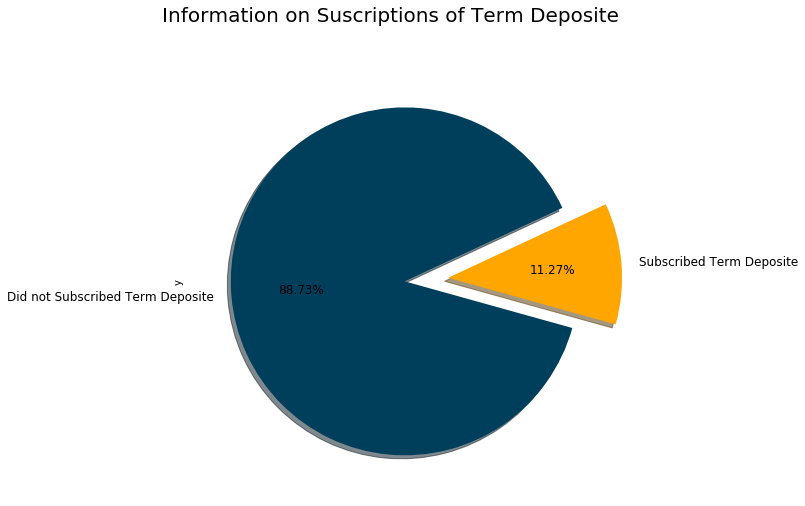

In [5]:
f, ax = plt.subplots(1, figsize=(16,8))

colors = ["#003f5c", "#ffa600"]
labels ="Did not Subscribed Term Deposite", "Subscribed Term Deposite"

plt.suptitle('Information on Suscriptions of Term Deposite', fontsize=20)

df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

 - From the above analysis it is clear that Data is not evenly distributed
 - We will be needing some sampling technique to balance the data so that our model will perform well in actual setup

In [6]:
def count_plot(df,col):
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index, palette = "rocket")
    plt.title(col)
    plt.tight_layout()

In [7]:
def freq_dist(df,col):
    plt.figure(figsize=(15,10))
    sns.countplot(x=col,hue="y",data=df, order = df[col].value_counts().index, palette = "dark")
    plt.show()

In [8]:
def normalized_relative_freq(df,col):
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index, palette = "Spectral")
    plt.title(col)
    plt.tight_layout()


In [9]:
def data_analysis(df,col):
    count_plot(df,col)
    freq_dist(df,col)
    normalized_relative_freq(df,col)

# Categorical Features
- First we will look into categorical features

# Job Feature Analysis

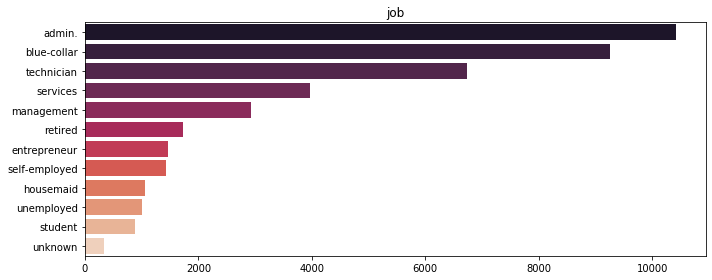

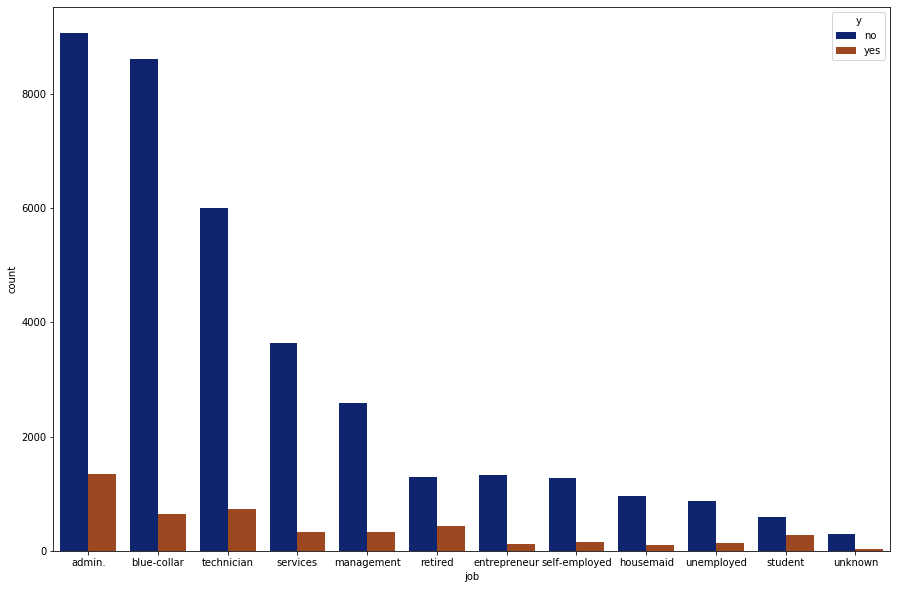

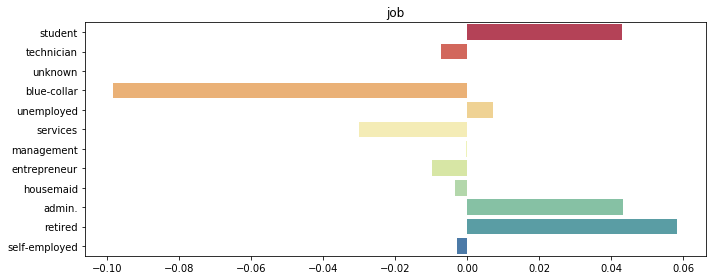

In [10]:
data_analysis(df,"job")

- Here by plotting normalized relative frequency we can imply that job category "retired","admin", "student" are highly likely to subscribe for Term Deposite

# Marital Feature Analysis

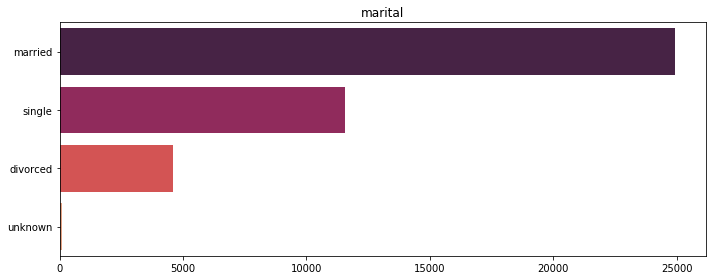

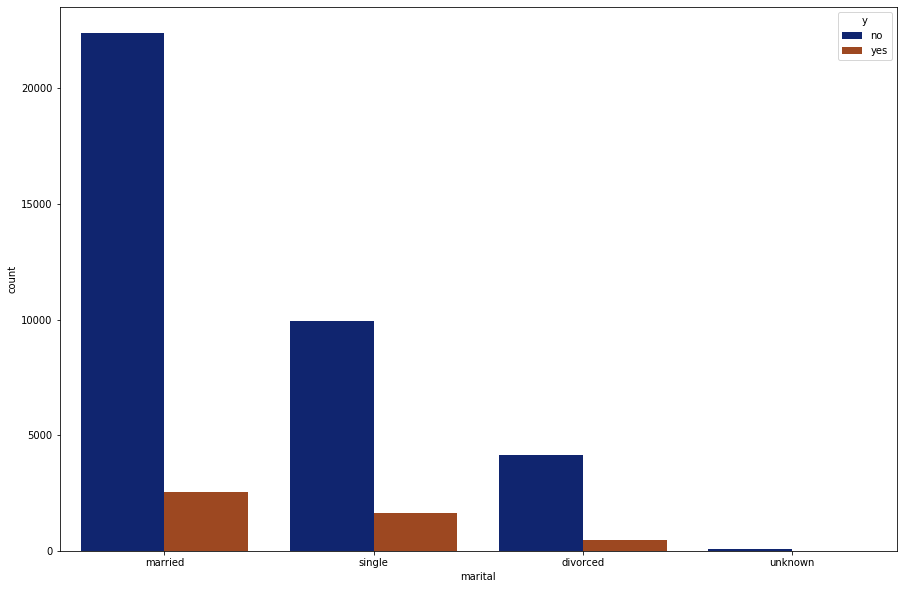

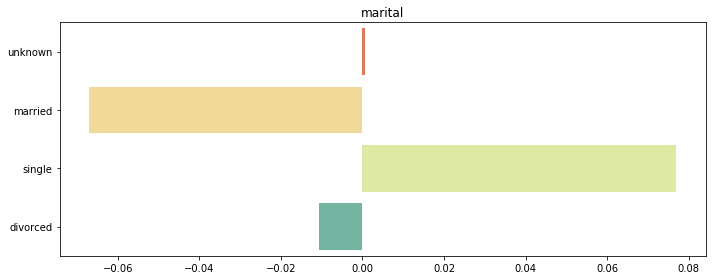

In [11]:
data_analysis(df,"marital")

- Here our normalized frequency graph tell us that marital status"single" are highly likely to subscribe for Team Deposite

# Education Feature Analysis

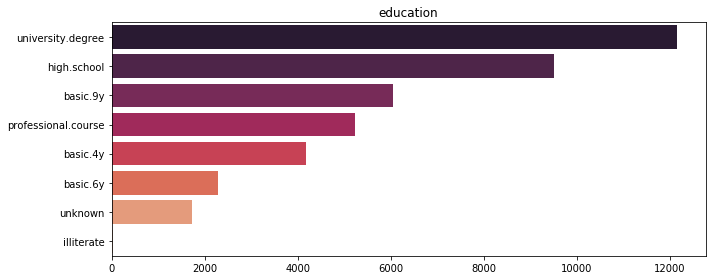

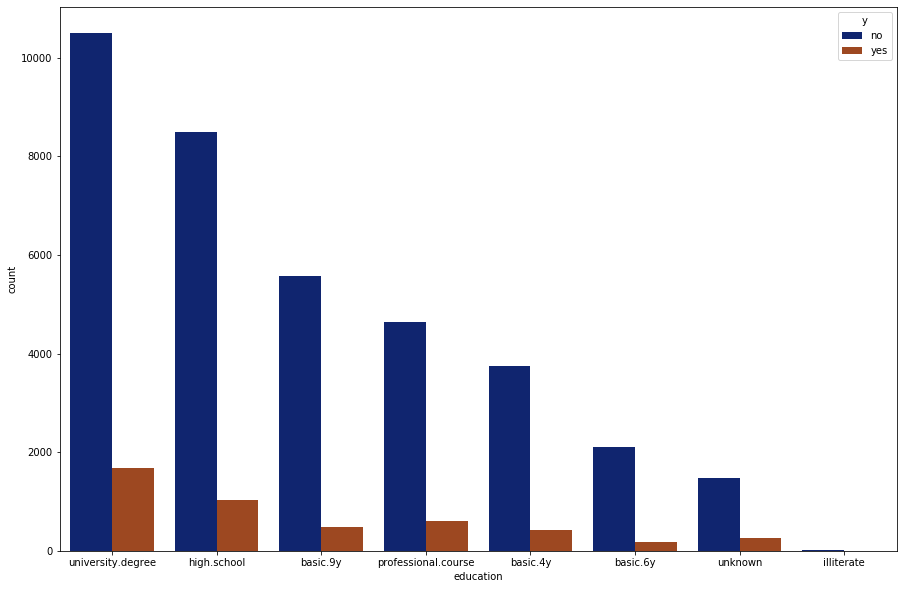

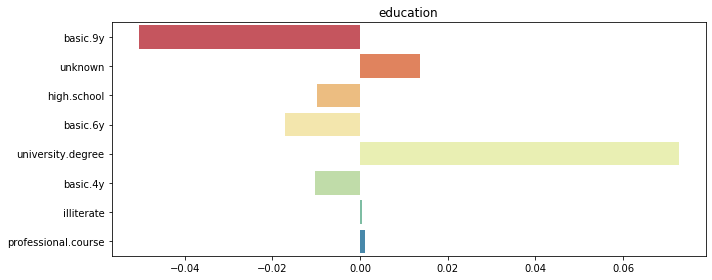

In [12]:
data_analysis(df,"education")

- Here our normalized frequency graph tell us that Education status "university.degree" are highly likely to subscribe for Team Deposite
- There is a variable named "unknown" which we will deal with later

# Default Feature Analysis

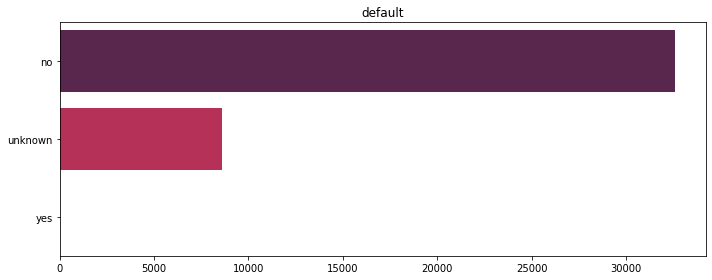

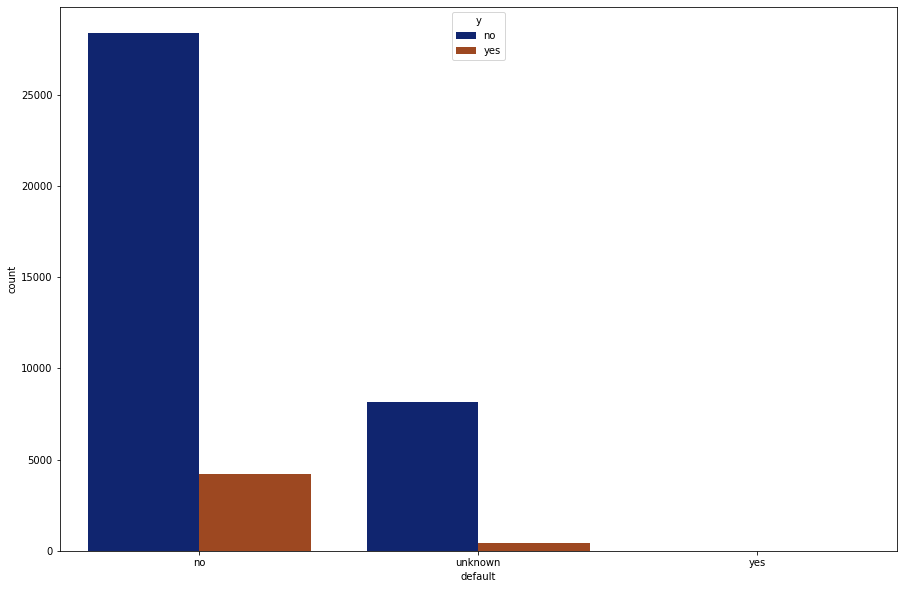

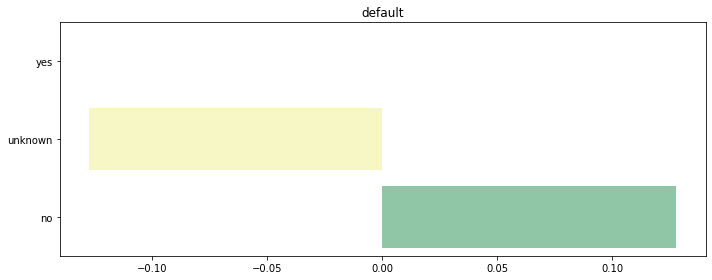

In [13]:
data_analysis(df,"default")

- Here our normalized frequency graph tell us that person with No defaults are highly likely to subscribe for Team Deposite

# Housing Feature Analysis

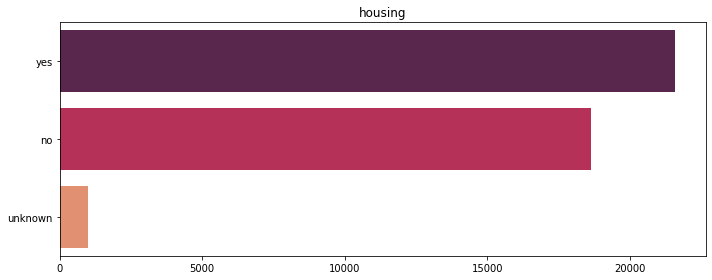

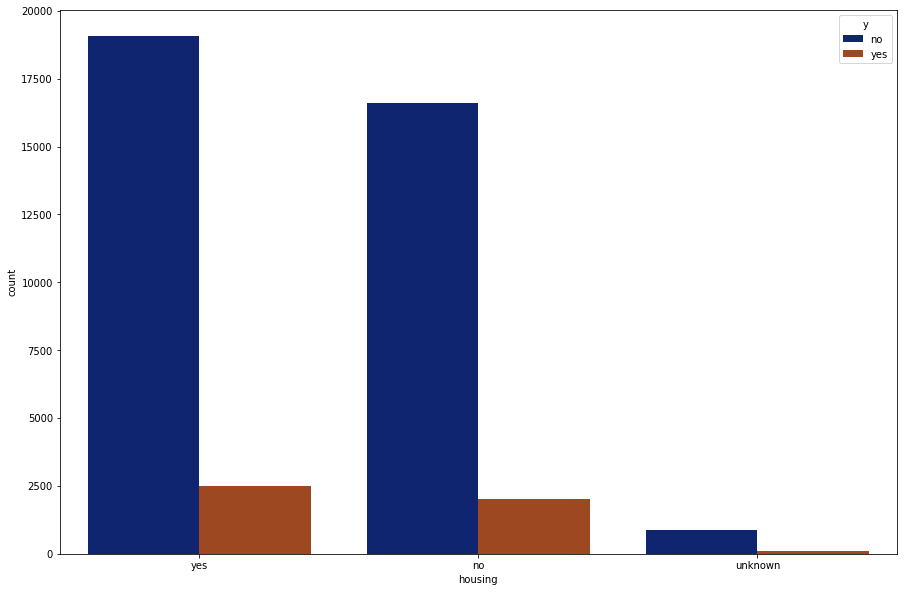

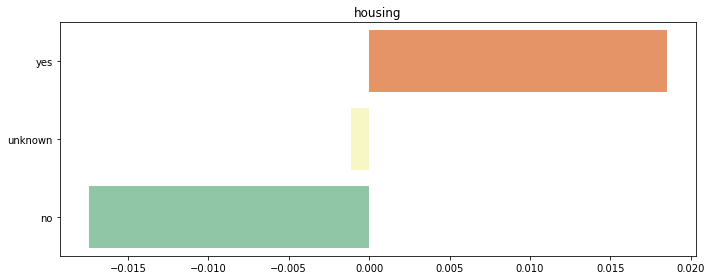

In [14]:
data_analysis(df,"housing")

- Here our normalized frequency graph tell us that person with Housing loan are highly likely to subscribe for Team Deposite

# Loan Feature Analysis

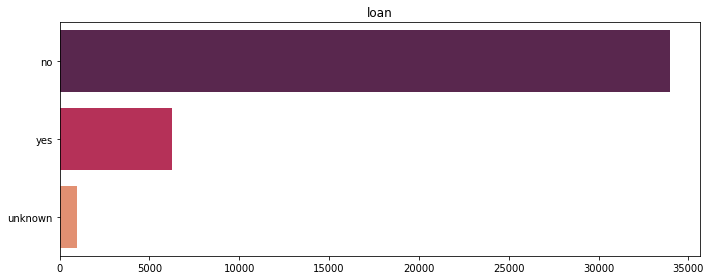

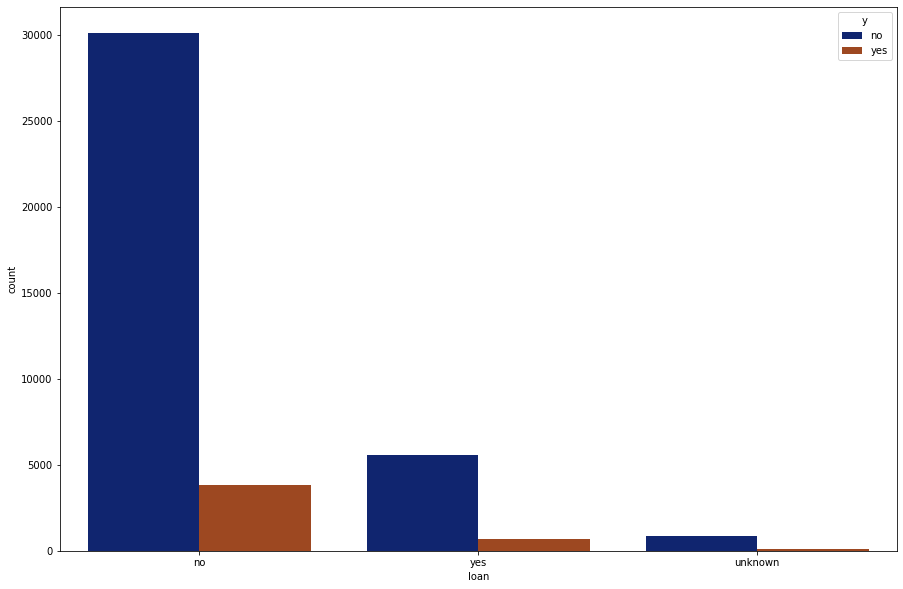

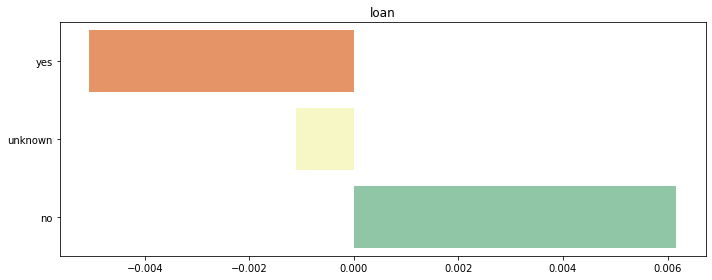

In [15]:
data_analysis(df,"loan")

- Here our normalized frequency graph tell us that person with NO loan are highly likely to subscribe for Team Deposite

# Contact Feature Analysis

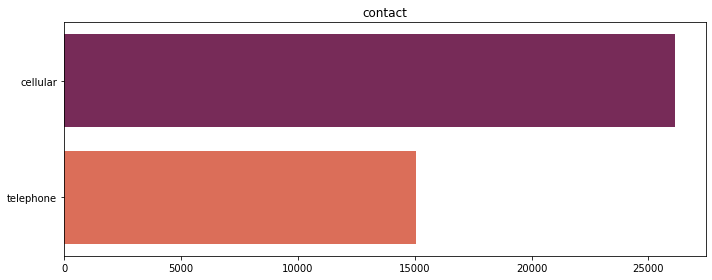

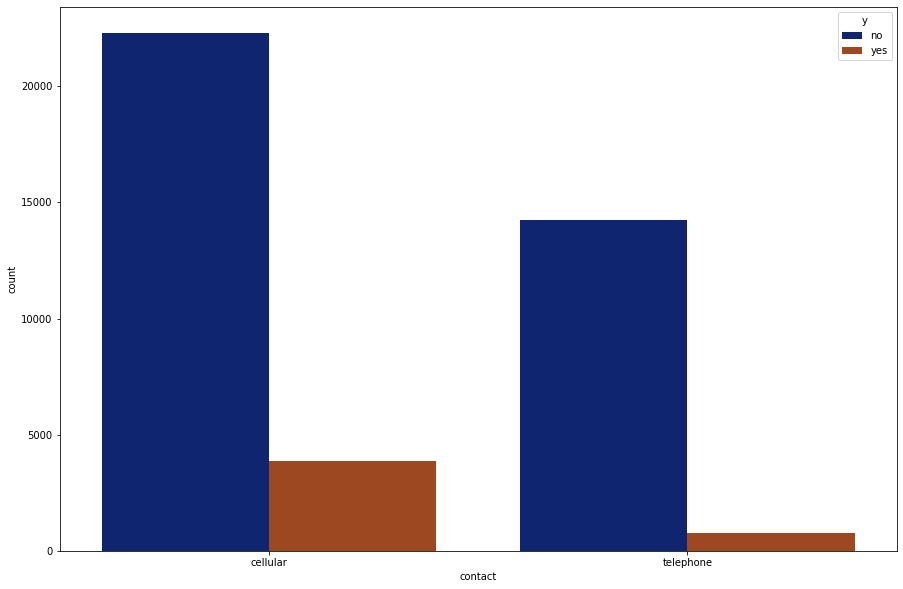

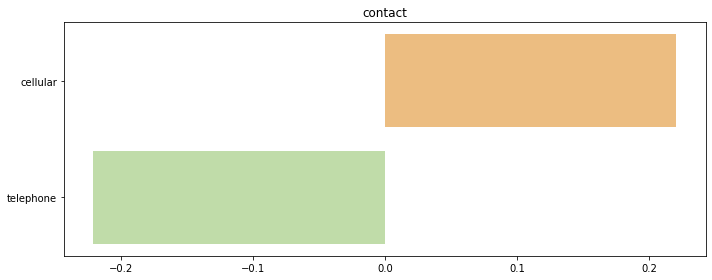

In [16]:
data_analysis(df,"contact")

- Here our normalized frequency graph tell us that person contacted by Cellular means are highly likely to subscribe for Team Deposite

# Month Feature Analysis

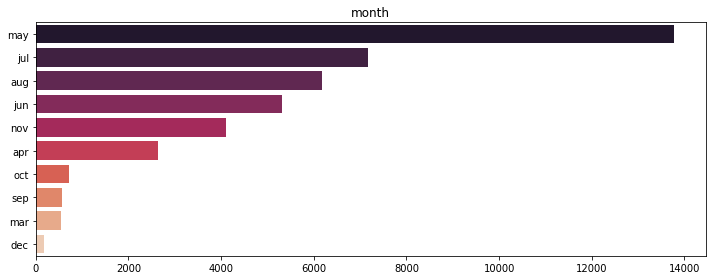

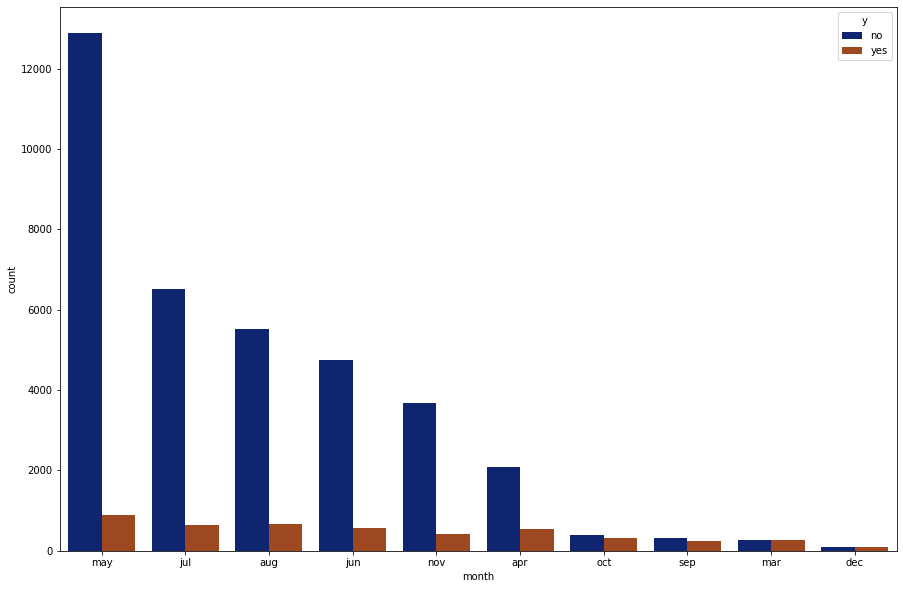

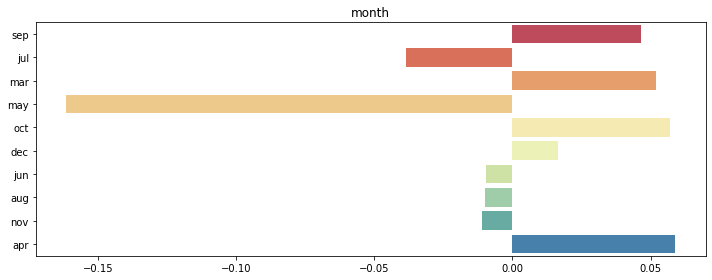

In [17]:
data_analysis(df,"month")

 - As the normalized frequency graph shows the best month to contact any person are "March", "April", "September", "October", "December".
 - The Campaign should be planed around that period of time

# Day of Week Feature Analysis

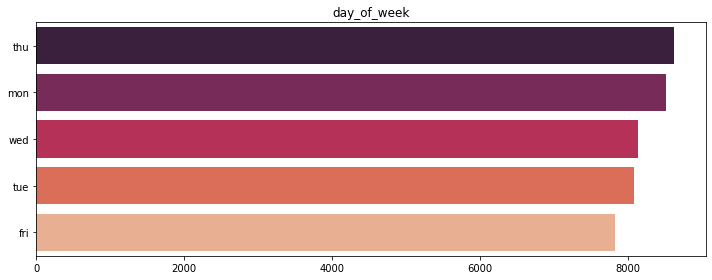

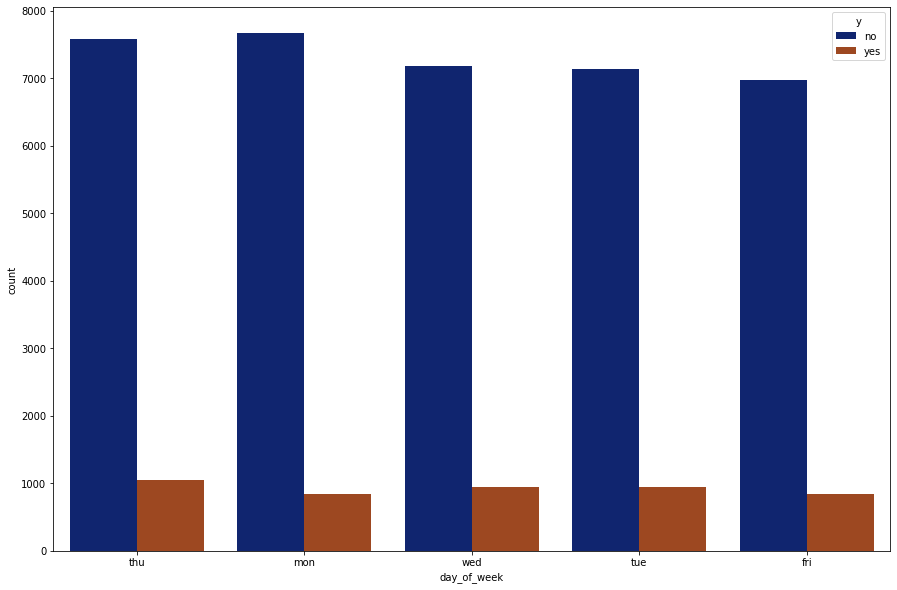

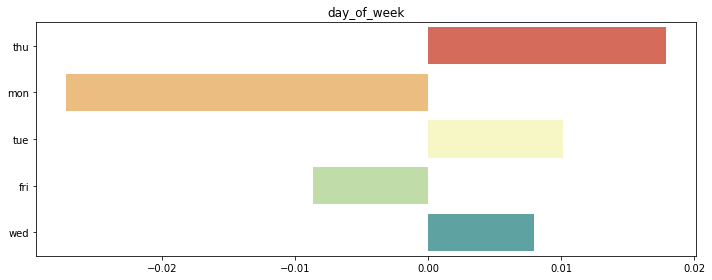

In [18]:
data_analysis(df,"day_of_week")

- As the normalized frequency graph shows the best day of week  to contact any person are "Tuesday", "Wednesday", "Thursday".

# Poutcome Feature Analysis

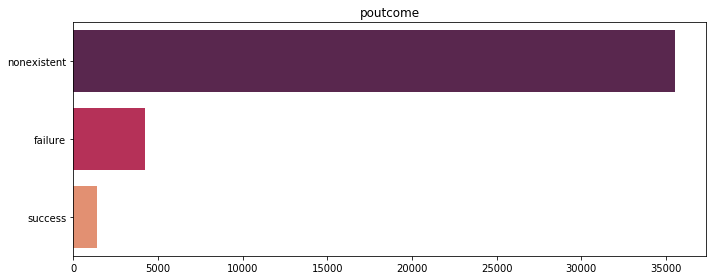

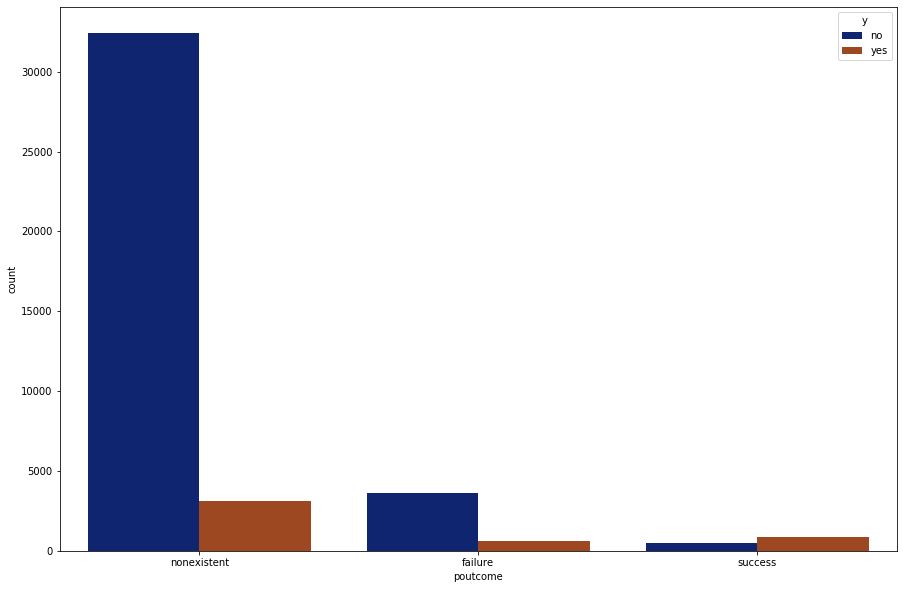

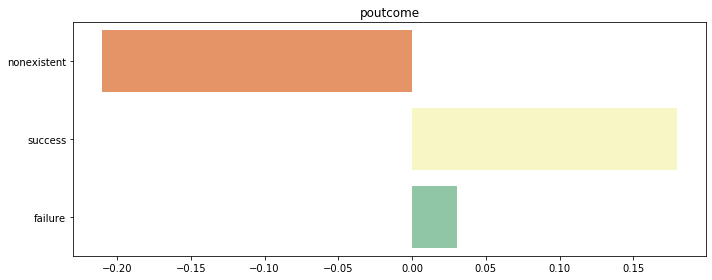

In [19]:
data_analysis(df,"poutcome")

- As per the Normalize Frequency Graph if outcome of previous campaign is success then we should contact the person
- Here most of the values are having "nonexistent" value which means they were not contacted before

# Numerical Feature
- Lets look into numeric features

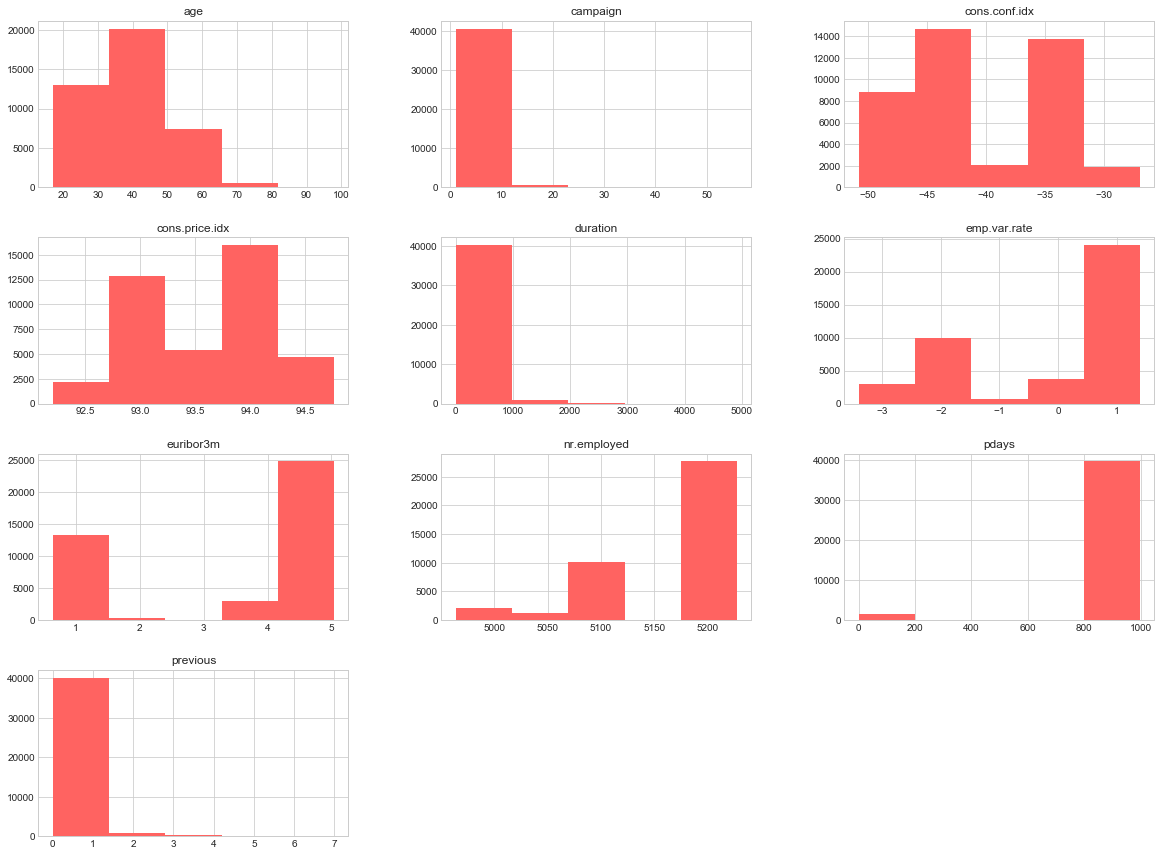

In [20]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=5, figsize=(20,15), color='#ff6361')
plt.show()

# Age Feature Analysis

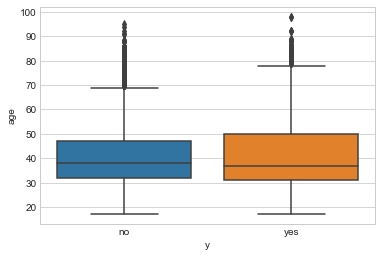

In [22]:
sns.boxplot(data=df,x='y',y='age')
plt.show()

# Duration Feature Analysis

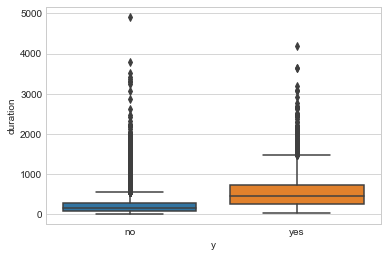

In [23]:
sns.boxplot(data=df,x='y',y='duration')
plt.show()

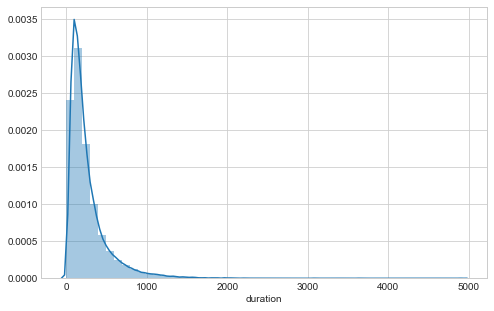

In [40]:
plt.figure(figsize=(8,5))
sns.distplot(df["duration"])
plt.show()

# Campaign Feature Analysis

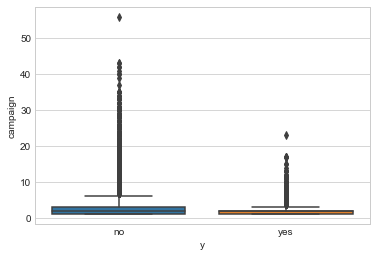

In [41]:
sns.boxplot(data=df,x='y',y='campaign')
plt.show()

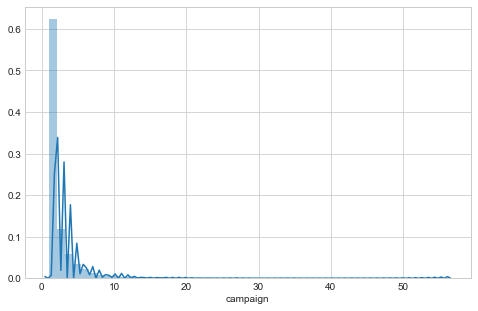

In [39]:
plt.figure(figsize=(8,5))
sns.distplot(df["campaign"])
plt.show()

# pdays Feature Analysis

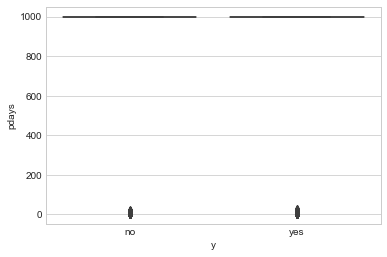

In [42]:
sns.boxplot(data=df,x='y',y='pdays')
plt.show()

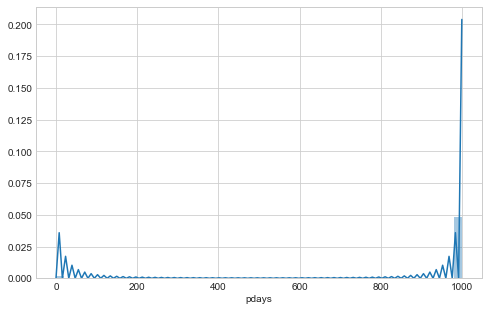

In [43]:
plt.figure(figsize=(8,5))
sns.distplot(df["pdays"])
plt.show()

# previous Feature Analysis

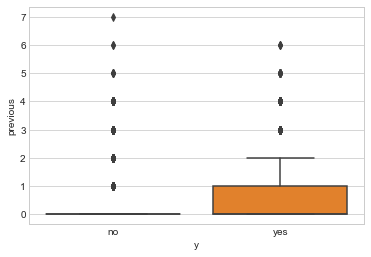

In [44]:
sns.boxplot(data=df,x='y',y='previous')
plt.show()

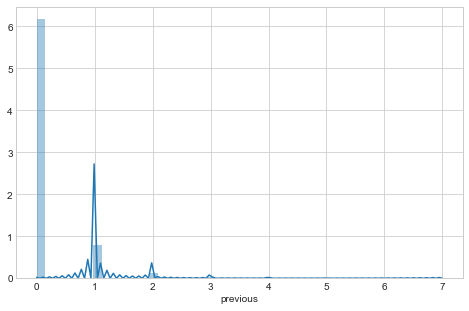

In [45]:
plt.figure(figsize=(8,5))
sns.distplot(df["previous"])
plt.show()

# emp.var.rate Feature Analysis

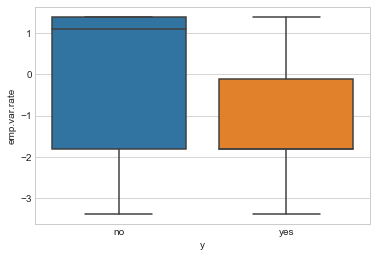

In [24]:
sns.boxplot(data=df,x='y',y='emp.var.rate')
plt.show()

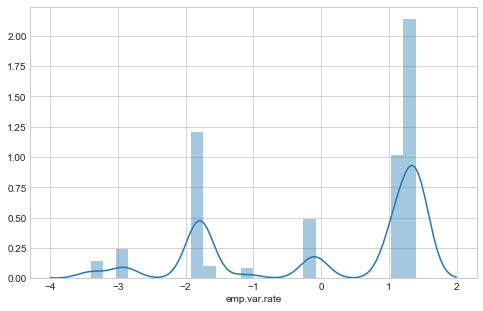

In [27]:
plt.figure(figsize=(8,5))
sns.distplot(df["emp.var.rate"])
plt.show()

# euribor3m Feature Analysis

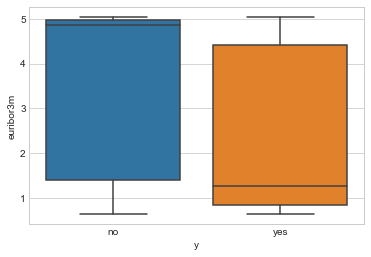

In [29]:
sns.boxplot(data=df,x='y',y='euribor3m')
plt.show()

- From the above plot, we can clearly see the difference in median for both the classes. This indicates that the feature can be very useful for our case study.

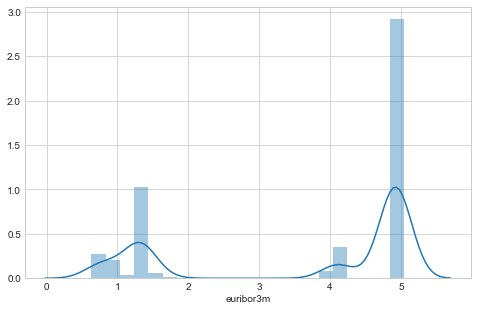

In [30]:
plt.figure(figsize=(8,5))
sns.distplot(df["euribor3m"])
plt.show()

# cons.price.idx Feature Analysis

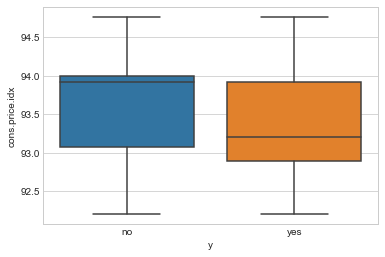

In [32]:
sns.boxplot(data=df,x='y',y='cons.price.idx')
plt.show()

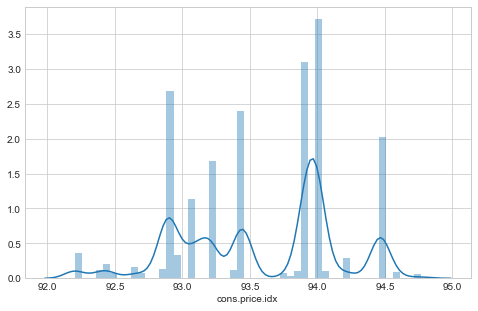

In [33]:
plt.figure(figsize=(8,5))
sns.distplot(df["cons.price.idx"])
plt.show()

# cons.conf.idx Feature Analysis

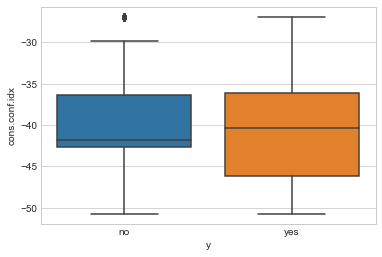

In [34]:
sns.boxplot(data=df,x='y',y='cons.conf.idx')
plt.show()

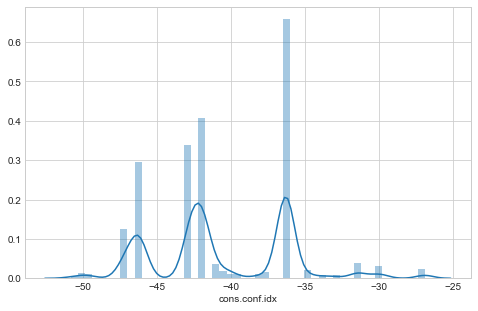

In [35]:
plt.figure(figsize=(8,5))
sns.distplot(df["cons.conf.idx"])
plt.show()

# nr.employed Feature Analysis

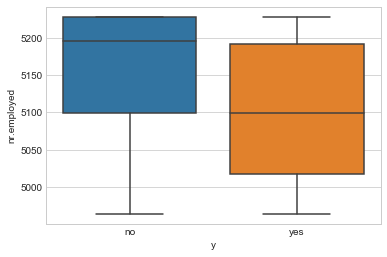

In [37]:
sns.boxplot(data=df,x='y',y='nr.employed')
plt.show()

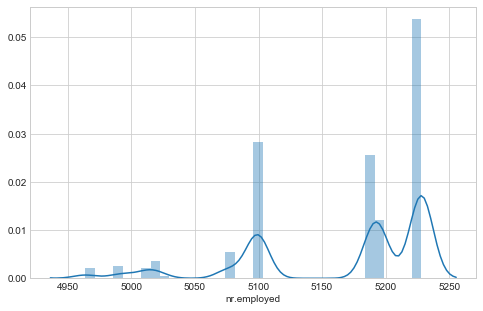

In [36]:
plt.figure(figsize=(8,5))
sns.distplot(df["nr.employed"])
plt.show()

# Correlation Matrix of the numerical features:

Text(0.5, 1.05, 'Pearson correlation of Features')

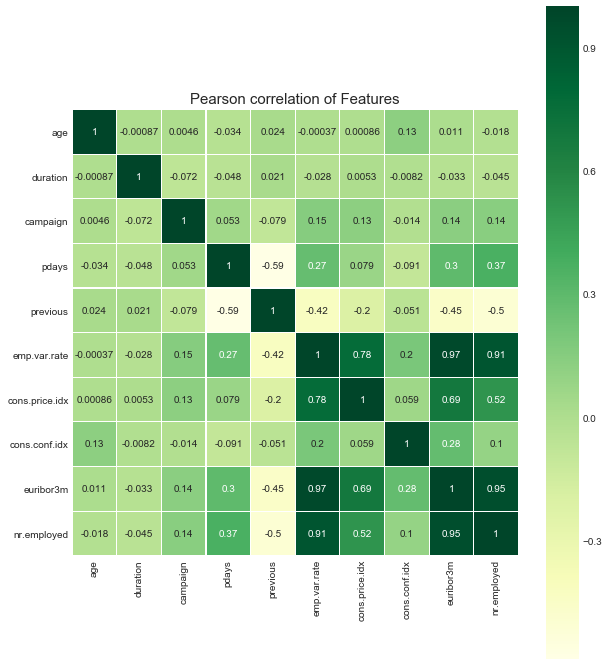

In [31]:
corr = df.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

- The emp.var.rate, cons.price.idx, euribor3m and nr.employed features have very high correlation. With euribor3m and nr.employed having the highest correlation of 0.95!

In [21]:
numeric = ['age','campaign','cons.conf.idx','cons.price.idx','duration','emp.var.rate','euribor3m','nr.employed','pdays','previous']
df[numeric].describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,-40.502600,93.575664,258.285010,0.081886,3.621291,5167.035911,962.475454,0.172963
std,10.42125,2.770014,4.628198,0.578840,259.279249,1.570960,1.734447,72.251528,186.910907,0.494901
min,17.00000,1.000000,-50.800000,92.201000,0.000000,-3.400000,0.634000,4963.600000,0.000000,0.000000
25%,32.00000,1.000000,-42.700000,93.075000,102.000000,-1.800000,1.344000,5099.100000,999.000000,0.000000
50%,38.00000,2.000000,-41.800000,93.749000,180.000000,1.100000,4.857000,5191.000000,999.000000,0.000000
75%,47.00000,3.000000,-36.400000,93.994000,319.000000,1.400000,4.961000,5228.100000,999.000000,0.000000
max,98.00000,56.000000,-26.900000,94.767000,4918.000000,1.400000,5.045000,5228.100000,999.000000,7.000000


-  From the source of the data (U.C. Irvine ML Repository), we're told that the missing values, or NaNs, are encoded as '999'. -  From the analysis above, it is clear that only 'pdays' has missing values. Moreover, a majority of the values for 'pdays' are missing.
-  Outliers are defined as 1.5 x Q3 value (75th percentile). From the above table, it can be seen that only 'age' and 'campaign' have outliers as max('age') and max('campaign') > 1.5Q3('age') and >1.5Q3('campaign') respectively.
-  But we also see that the value of these outliers are not so unrealistic (max('age')=98 and max('campaign')=56). Hence, we need not remove them since the prediction model should represent the real world. This improves the generalizability of the model and makes it robust for real world situations. The outliers, therefore, are not removed.

# Conclusion of Analysis

- Analyzing the dataset we found that out of **20 Features**
    - 10 features were Numerical Features
    - 10 features were Categorical Features


- The data is highly skewed as there are **88.73%** of values for people who did not subscribed for Term Deposit


- There are **"Unknown"** values in many categorical variables in the Data Set
    - One way to handle the missing values is to remove the row but drawback of this will be reduction of dataset which will not solve our purpose
    - Good way to solve this problem will be inferring this "unknown" values by doing imputation
    - Variables with unknown values are "job","marital","education","default", "housing", "loan"
    
    
- There are **"999"** values in pdays variable which is numeric 


- The **"Normalized Relavtive Frequency"** graph for each individual variable gives a very good Idea about the turn around for people subscribing the term deposit and it can be used to plan the next campaign! 

--------------------------------------------------------------------------------------
*please refer to "Data Preparation - Market Campaign" for next step*
-------------------------------------------------------------------------------------------